## contact:
### 张丹 zd18@tsinghua.org.cn

Loss: 0.6931471805599453
Loss: 0.6819438333835709
Loss: 0.6818547003974644
Loss: 0.68185363267551
Loss: 0.6818536183107224
Loss: 0.6818536181119318
Loss: 0.6818536181091629
Loss: 0.6818536181091239
Loss: 0.6818536181091234
Loss: 0.6818536181091236


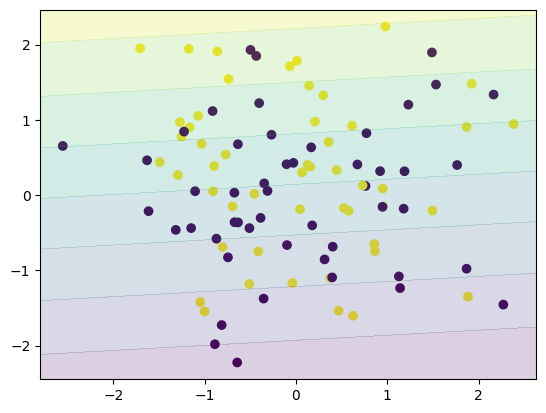

In [8]:
## 以下是一个简单的手写逻辑回归算法的示例，其中使用了numpy和matplotlib库：
### 该算法使用随机生成的二维数据集进行训练，并输出每100次迭代的损失函数值。训练完成后，使用matplotlib库可视化分类结果。
### python
import numpy as np
import matplotlib.pyplot as plt
# 构造数据集
np.random.seed(0)
X = np.random.randn(100, 2)
y = np.random.randint(0, 2, size=100)
# 定义sigmoid函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
# 定义损失函数
def loss(h, y): #h是预测值
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
# 定义训练函数
def train(X, y, lr=0.1, num_iter=1000):
    # 初始化权重和偏差
    w = np.zeros(X.shape[1])
    b = 0
    # 梯度下降
    for i in range(num_iter):
        z = np.dot(X, w) + b
        h = sigmoid(z)
        dw = np.dot(X.T, (h - y)) / y.size #dw和db分别是w和b的梯度，通过链式法则得来
        db = (h - y).mean()
        w -= lr * dw
        b -= lr * db
        # 每100次迭代输出一次损失函数值
        if i % 100 == 0:
            print(f'Loss: {loss(h, y)}')
    return w, b
# 训练模型
w, b = train(X, y)
# 可视化结果
plt.scatter(X[:,0], X[:,1], c=y)
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))
Z = sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2)
plt.show()

In [7]:
## 以下是手写带有L2正则化项的逻辑回归算法的Python代码实现：
### 此实现使用了L2正则化，lambda_reg参数控制正则化强度。如果要使用L1正则化，可以将正则化项更改为绝对值的和，然后相应地更改梯度更新。
### python
import numpy as np
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, lambda_reg=0.01):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.lambda_reg = lambda_reg
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def __loss(self, h, y, w):
        # L2正则化
        reg_term = (self.lambda_reg/(2*len(y))) * np.sum(w[1:]**2)
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean() + reg_term
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        self.w = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.w)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / len(y)
            reg_term = (self.lambda_reg/len(y)) * self.w[1:]
            gradient[1:] += reg_term
            self.w -= self.lr * gradient
            
            if i % 10000 == 0:
                z = np.dot(X, self.w)
                h = self.__sigmoid(z)
                print(f'Loss: {self.__loss(h, y, self.w)}')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.w))
    
    def predict(self, X, threshold=0.5):
        return self.predict_prob(X) >= threshold
    
X = np.random.randn(100, 2)
y = np.random.randint(0, 2, size=100)
lore = LogisticRegression()
lore.fit(X, y)

Loss: 0.6930084190663954
Loss: 0.6668506274060665
Loss: 0.6668506274060664
Loss: 0.6668506274060664
Loss: 0.6668506274060664
Loss: 0.6668506274060664
Loss: 0.6668506274060664
Loss: 0.6668506274060664
Loss: 0.6668506274060664
Loss: 0.6668506274060664
